# Логистическая Регрессия 

# Stage_1

Приведение наших данных к красивому виду


In [2]:
import pandas as pd

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

ds = pd.read_csv(dataset_url,
                 names = [
                     'variance',
                     'skewness',
                     'curtosis',
                     'entropy',
                     'class',
                 ],
                )
ds.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Построение Двумерного графика на основе variance & skewness

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='variance', ylabel='skewness'>

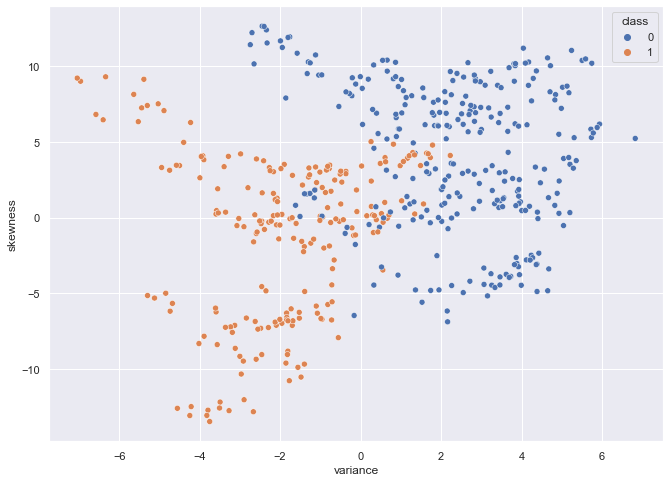

In [6]:
%pylab inline
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})

sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(500))

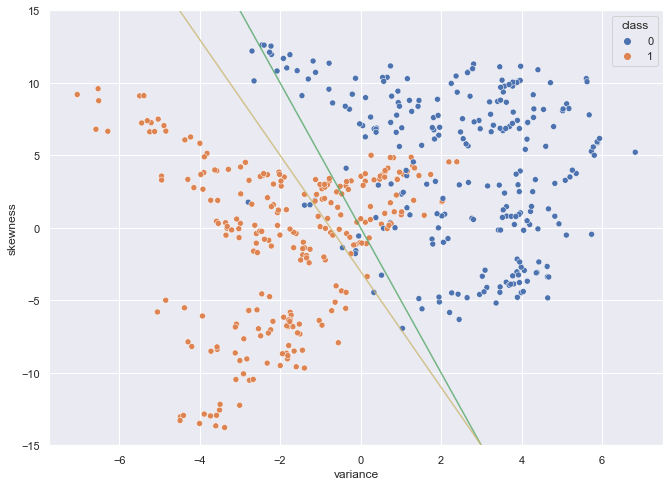

In [8]:
import numpy as np

sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(500));

lines = [([0, -5], 'g'),
         ([-3, -4], 'y')]

for line in lines:
    x = np.linspace(-6, 6, 100)
    y = line[0][0] + x*line[0][1]
    plt.plot(x, y, color=line[1], alpha=0.8)
plt.ylim((-15, 15));


In [9]:
from sklearn.metrics import accuracy_score

acc = []
for line in lines:
    pred = ds['skewness'] - line[0][1]*ds['variance'] - line[0][0] < 0
    acc.append(accuracy_score(ds['class'], pred))

print(f"Точность для зеленой прямой: {acc[0]:.3}")
print(f"Точность для желтой прямой: {acc[1]:.3}")

Точность для зеленой прямой: 0.873
Точность для желтой прямой: 0.848


In [12]:
def logloss(theta, x, y):
    n = len(y)
    def sigma(z):
        return 1/(1 + np.exp(-z))
    return -1/n*np.sum(y*np.log(sigma(theta*x)) + (1-y)*np.log(1 - sigma(theta*x)))

In [14]:
def sigma(z):
    return 1/(1+np.exp(-z))

def grad(y, X, theta):
    n = y.shape[0]
    return 1/n * X.transpose() @ (sigma(X @ theta) - y)

def L(y, X, theta):
    n = y.shape[0]
    return -1/(n)*np.sum(y*np.log(sigma(X @ theta)) + (1 - y)*np.log(1 - sigma(X @ theta)))

def fit(y, X, theta_0, alpha=0.001, nsteps = 100):
    theta = np.copy(theta_0)
    loss = [L(y, X, theta)]
    for i in range(nsteps):
        theta -= alpha*grad(y, X, theta)
        loss.append(L(y, X, theta))
    return loss, theta

In [15]:
X = ds[['variance', 'skewness']]
y = ds['class']

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

norm_X = (X - X_mean)/X_std

In [16]:
n = len(X)
X = np.hstack((np.ones((n, 1)), norm_X))
m = 2
theta_0 = np.zeros(m + 1)
loss_history, theta_star = fit(y, X, theta_0, alpha=1e-2, nsteps=10000)

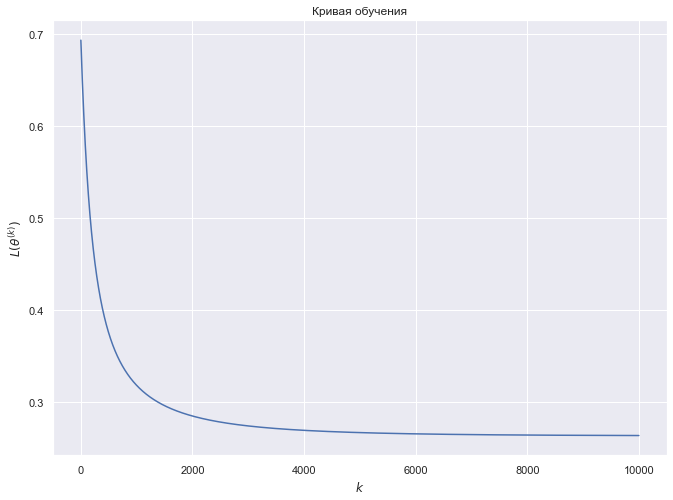

In [17]:
plt.plot(loss_history)
plt.xlabel('$k$')
plt.ylabel('$L(\\theta^{(k)})$')
plt.title('Кривая обучения');

In [18]:
theta_star

array([-0.4040733 , -2.97840374, -1.51102885])

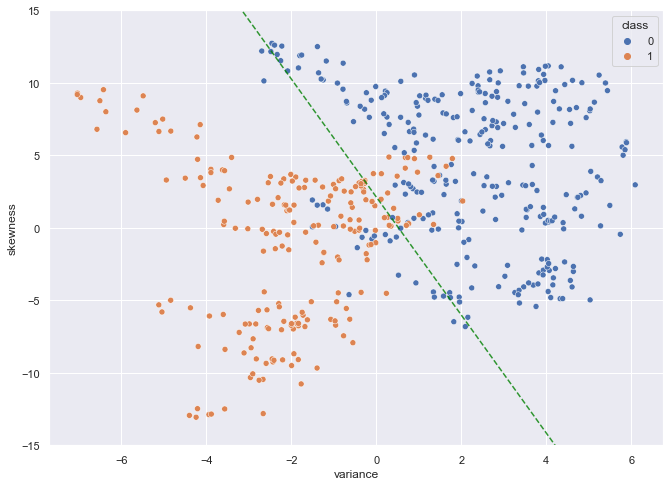

In [19]:
sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(500));

x_tmp = np.linspace(-6, 6, 100)
y_tmp = - (theta_star[0] + (x_tmp - X_mean[0])/X_std[0]*theta_star[1])/theta_star[2]

plt.plot(x_tmp, X_std[1]*y_tmp + X_mean[1] , color="green", alpha=0.8, linestyle='--')
plt.ylim((-15, 15));

In [20]:
y_pred = X @ theta_star > 0
logreg_score = accuracy_score(y, y_pred)
print(f'Logistic Regression accuracy: {logreg_score:.3f}')

Logistic Regression accuracy: 0.886
